In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# Generate Erdos-Renyi Random Graph by Hand (n = 20, p = 0.1, 0.5, 0.9)

random.seed()

n = 20
p = 0.1

G = nx.Graph()
nodes = range(n)
G.add_nodes_from(nodes)

# Addding the edges using our random experiment
for i in range(n):
    for j in range(i+1, n):
        if random.random() < p:
            G.add_edge(i, j)

In [5]:
# Check some common parameters and properties of the graph
# Wrap it up as a function so that we can reuse it for other graphs

def graph_stats(G):
    print("Number of nodes \t=", G.number_of_nodes())
    print("Number of edges \t=", G.number_of_edges())
    print("Average Degree \t\t=", 2.0 * G.number_of_edges()/G.number_of_nodes())
    print("Number of components \t=", nx.number_connected_components(G))
    print("Largest component \t=", max([len(Gc)
          for Gc in nx.connected_components(G)]))
    if nx.is_connected(G):
        print("Diameter \t\t=", nx.diameter(G))
    print("Is planar \t\t=", nx.is_planar(G))
    print("Is bipartite \t\t=", nx.is_bipartite(G))

Number of nodes 	= 20
Number of edges 	= 27
Average Degree 		= 2.7
Number of components 	= 3
Largest component 	= 18
Is planar 		= True
Is bipartite 		= False


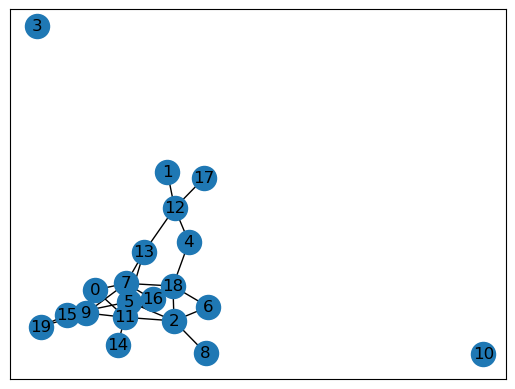

In [6]:
# Check the parameters of the generated graph and draw it
graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G)

In [7]:
# Generate the same Erdos-Renyi Random Graphs using the built-in function

n = 20
p = 0.1
G = nx.gnp_random_graph(n, p)

Number of nodes 	= 20
Number of edges 	= 18
Average Degree 		= 1.8
Number of components 	= 5
Largest component 	= 16
Is planar 		= True
Is bipartite 		= False


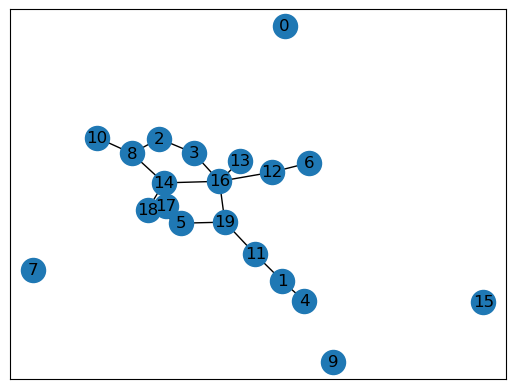

In [8]:
# Check the parameters of the generated graph and draw it
graph_stats(G)
pos = nx.circular_layout(nx.cycle_graph(n))
nx.draw_networkx(G)

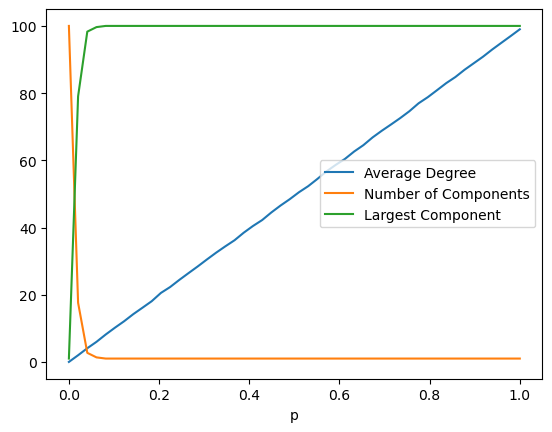

In [9]:
# Phase Transitions of G(100, p) for p varying from 0 to 0.1
# (Average Degree, Number of Components, Size of largest component, Diameter when Connected)
# Estimate each parameter averaged over 10 repetitions

n = 100
steps = 50
p_vals = np.linspace(0, 1, steps)

repeats = 20
avg_deg = []
num_comps = []
max_comp = []
dia = []

for p in p_vals:
    total_adeg = 0
    total_comp = 0
    total_size = 0
    total_dia = 0
    for i in range(repeats):
        G = nx.gnp_random_graph(n, p)
        adeg = 2.0 * G.number_of_edges() / G.number_of_nodes()
        total_adeg += adeg
        total_comp += nx.number_connected_components(G)
        total_size += max([len(Gc) for Gc in nx.connected_components(G)])
        if nx.is_connected(G):
            total_dia += nx.diameter(G)
        else:
            total_dia = float('inf')
    avg_deg.append(total_adeg/repeats)
    num_comps.append(total_comp/repeats)
    max_comp.append(total_size/repeats)
    dia.append(total_dia/repeats)

plt.plot(p_vals, avg_deg, label='Average Degree')
plt.plot(p_vals, num_comps, label='Number of Components')
plt.plot(p_vals, max_comp, label='Largest Component')
plt.xlabel('p')
plt.legend()

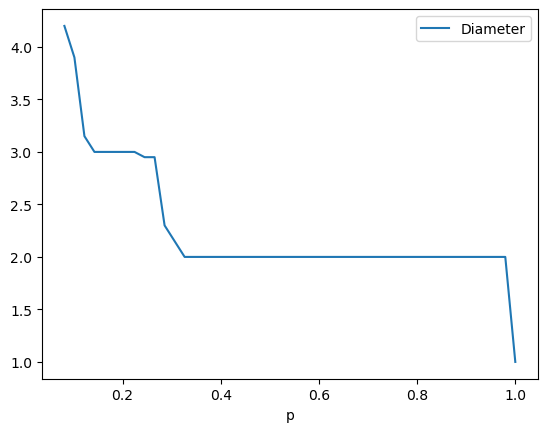

In [10]:
# A closer look at the diameter transition

plt.plot(p_vals, dia, label='Diameter')
plt.xlabel('p')
plt.legend()

Text(0, 0.5, 'Number of nodes')

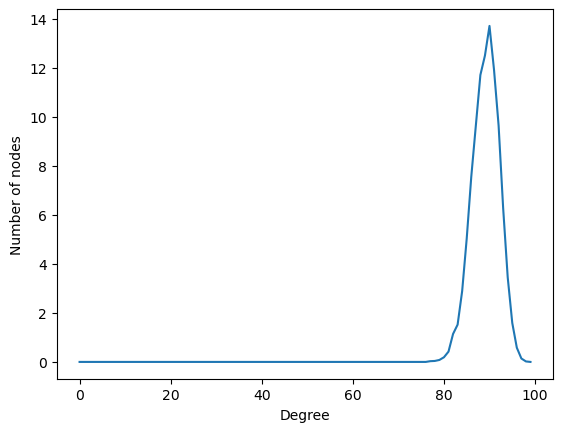

In [11]:
# Plot the degree histogram of G(n,p) averaged over 100 trials each for p = 0.1, 0.5

n = 100
p = 0.9

repeats = 100
deg_hist_table = np.zeros((repeats, n))

random.seed()
for i in range(repeats):
    G = nx.erdos_renyi_graph(n, p)
    dh = nx.degree_histogram(G)
    deg_hist_table[i, 0:len(dh)] = dh

deg_hist = sum(deg_hist_table)/repeats
plt.plot(deg_hist)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')

In [12]:
# Exercise 1a. Analyse the centrality measures of G(1000, 0.1)


# Generate the Erdős-Rényi graph
n = 1000
p = 0.1
G = nx.gnp_random_graph(n, p, seed=42)

# Check if the graph is connected; if not, use the largest connected component
if not nx.is_connected(G):
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(
        f"Using largest connected component with {G.number_of_nodes()} nodes.")

# Compute centrality measures
print("Computing degree centrality...")
degree_cent = list(nx.degree_centrality(G).values())

print("Computing betweenness centrality... (This may take some time)")
betweenness_cent = list(nx.betweenness_centrality(G).values())

print("Computing closeness centrality...")
closeness_cent = list(nx.closeness_centrality(G).values())

print("Computing eigenvector centrality...")
eigenvector_cent = list(nx.eigenvector_centrality(
    G, max_iter=1000, tol=1e-6).values())

Computing degree centrality...
Computing betweenness centrality... (This may take some time)
Computing closeness centrality...
Computing eigenvector centrality...


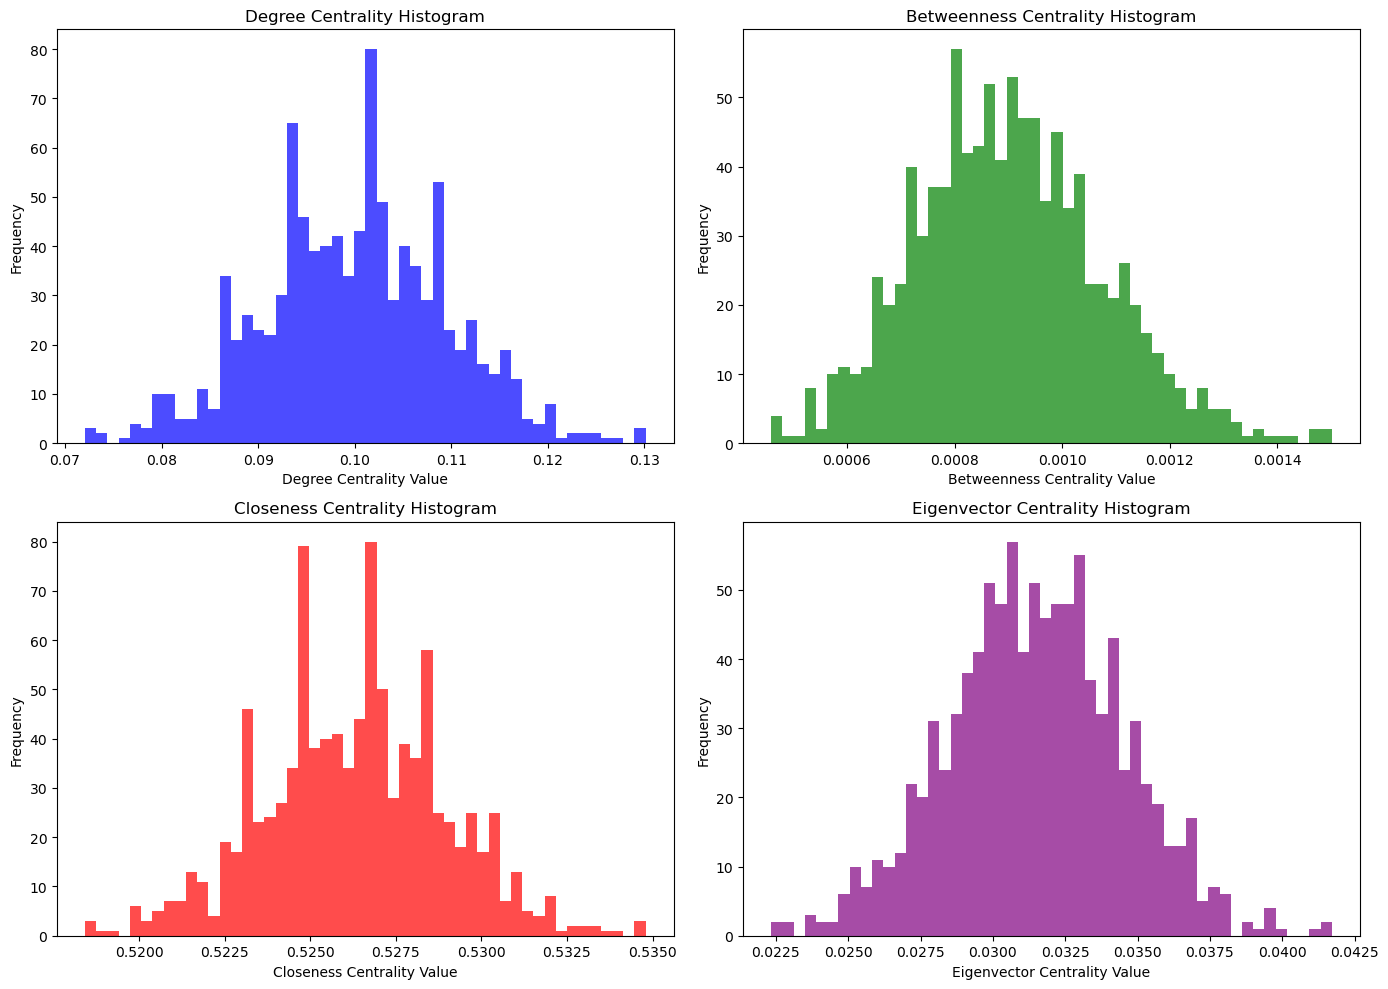

In [13]:
# Exercise 1b: Histogram of Centrality Measures of G(1000, 0.1)

# Plot histograms of centrality measures
plt.figure(figsize=(14, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.hist(degree_cent, bins=50, color='blue', alpha=0.7)
plt.title('Degree Centrality Histogram')
plt.xlabel('Degree Centrality Value')
plt.ylabel('Frequency')

# Betweenness Centrality
plt.subplot(2, 2, 2)
plt.hist(betweenness_cent, bins=50, color='green', alpha=0.7)
plt.title('Betweenness Centrality Histogram')
plt.xlabel('Betweenness Centrality Value')
plt.ylabel('Frequency')

# Closeness Centrality
plt.subplot(2, 2, 3)
plt.hist(closeness_cent, bins=50, color='red', alpha=0.7)
plt.title('Closeness Centrality Histogram')
plt.xlabel('Closeness Centrality Value')
plt.ylabel('Frequency')

# Eigenvector Centrality
plt.subplot(2, 2, 4)
plt.hist(eigenvector_cent, bins=50, color='purple', alpha=0.7)
plt.title('Eigenvector Centrality Histogram')
plt.xlabel('Eigenvector Centrality Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Number of nodes 	= 20
Number of edges 	= 30
Average Degree 		= 3.0
Number of components 	= 1
Largest component 	= 20
Diameter 		= 8
Is planar 		= False
Is bipartite 		= False


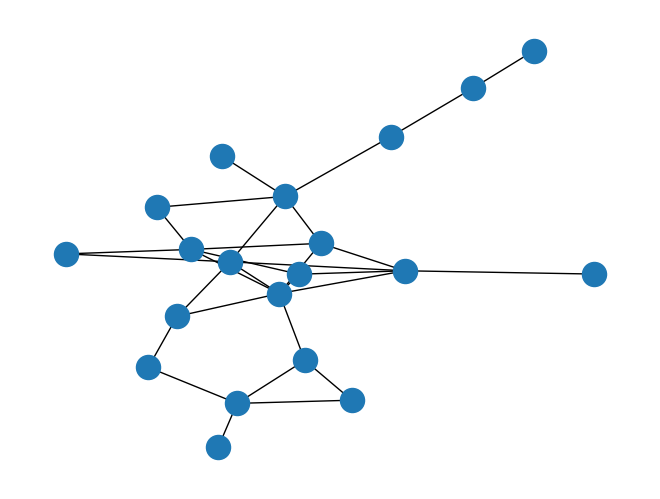

In [14]:
# Generate sample G(n, m) Graph using built-in function and display it

n = 20
m = 30

random.seed()
G = nx.gnm_random_graph(n, m)

graph_stats(G)
nx.draw(G)

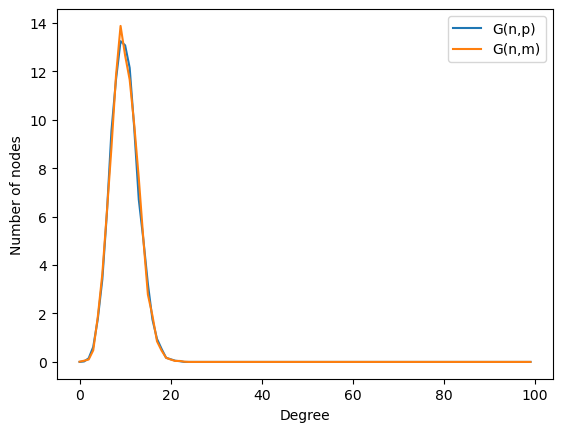

In [15]:
# Plot the degree histogram of G(n,m) averaged over 100 trials
# and compare it with the histogram of G(n,p) where m = p*nC2

n = 100
p = 0.1
m = int(0.1 * n * (n-1)/2)

repeats = 100
deg_hist_table_gnp = np.zeros((repeats, n))
deg_hist_table_gnm = np.zeros((repeats, n))

random.seed()
for i in range(repeats):
    G = nx.gnp_random_graph(n, p)
    dh = nx.degree_histogram(G)
    deg_hist_table_gnp[i, 0:len(dh)] = dh
    G = nx.gnm_random_graph(n, m)
    dh = nx.degree_histogram(G)
    deg_hist_table_gnm[i, 0:len(dh)] = dh


deg_hist_gnp = sum(deg_hist_table_gnp)/repeats
deg_hist_gnm = sum(deg_hist_table_gnm)/repeats

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.plot(deg_hist_gnp, label="G(n,p)")
plt.plot(deg_hist_gnm, label="G(n,m)")
plt.legend()

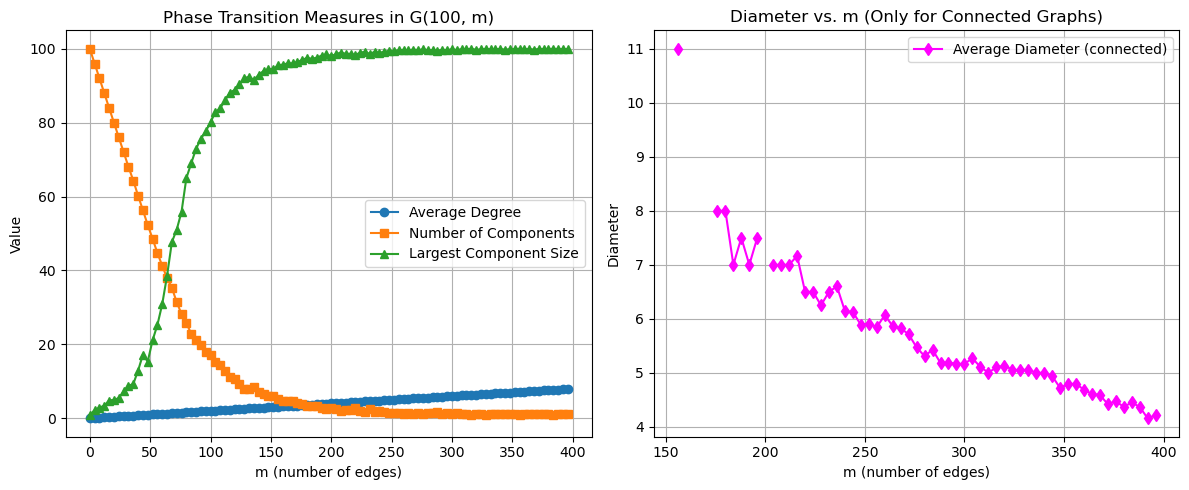

In [16]:
# Exercise 2: Phase Transitions of G(100, m) for 100 different values of m from 0 to 396
# (Average Degree, Number of Components, Size of largest component, Diameter when Connected)


# Set parameters
n = 100
# Create 100 distinct m values from 0 to 396 (step size 4)
m_vals = np.arange(0, 400, 4)  # 0, 4, 8, ..., 396
repeats = 20

# Lists to store average statistics for each m value
avg_deg_list = []
num_comps_list = []
max_comp_list = []
avg_dia_list = []

# Loop over each m value
for m in m_vals:
    total_deg = 0.0
    total_comps = 0.0
    total_max_comp = 0.0
    diameters = []  # collect diameters only for connected graphs

    for _ in range(repeats):
        G = nx.gnm_random_graph(n, m)
        # Since G(n, m) always has exactly m edges:
        adeg = 2.0 * G.number_of_edges() / n  # This equals 2*m/n
        total_deg += adeg

        num_comps = nx.number_connected_components(G)
        total_comps += num_comps

        # Find size of the largest connected component
        largest_comp = max(len(comp) for comp in nx.connected_components(G))
        total_max_comp += largest_comp

        # Compute diameter only if the graph is connected
        if nx.is_connected(G):
            diameters.append(nx.diameter(G))

    # Average measures over the repeats
    avg_deg = total_deg / repeats
    avg_num_comps = total_comps / repeats
    avg_max_comp = total_max_comp / repeats
    # Average diameter over connected graphs only (if any)
    if diameters:
        avg_dia = np.mean(diameters)
    else:
        avg_dia = np.nan  # or you could set to float('inf')

    avg_deg_list.append(avg_deg)
    num_comps_list.append(avg_num_comps)
    max_comp_list.append(avg_max_comp)
    avg_dia_list.append(avg_dia)

# Plot Average Degree, Number of Components, and Largest Component Size versus m
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(m_vals, avg_deg_list, label="Average Degree", marker='o')
plt.plot(m_vals, num_comps_list, label="Number of Components", marker='s')
plt.plot(m_vals, max_comp_list, label="Largest Component Size", marker='^')
plt.xlabel("m (number of edges)")
plt.ylabel("Value")
plt.title("Phase Transition Measures in G(100, m)")
plt.legend()
plt.grid(True)

# Plot Diameter (only computed for connected graphs)
plt.subplot(1, 2, 2)
plt.plot(m_vals, avg_dia_list, label="Average Diameter (connected)",
         color='magenta', marker='d')
plt.xlabel("m (number of edges)")
plt.ylabel("Diameter")
plt.title("Diameter vs. m (Only for Connected Graphs)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()